## Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# from zipfile import ZipFile
# file_name = 'archive.zip'
# with ZipFile(file_name,'r') as zip:
#   zip.extractall()
#   print("Done..")

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## File Location

In [2]:
d = os.path.join("/content/gdrive/MyDrive/Dataset/Training_Data(Resized)")
classes = ['Glass', 'Metal', 'Paper', 'Plastic', 'Trash']

In [3]:
for label in classes:
    directory = os.path.join(d, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "Glass":	 659
Images of label "Metal":	 592
Images of label "Paper":	 597
Images of label "Plastic":	 666
Images of label "Trash":	 256


In [4]:
dic = {}
path = "/content/gdrive/MyDrive/Dataset/Training_Data(Resized)"
for cla in classes:
  dic[cla] = [len([os.path.join(path+'/'+cla, filename) for filename in os.listdir(path+'/'+cla)])]

samplesize = pd.DataFrame.from_dict(dic)

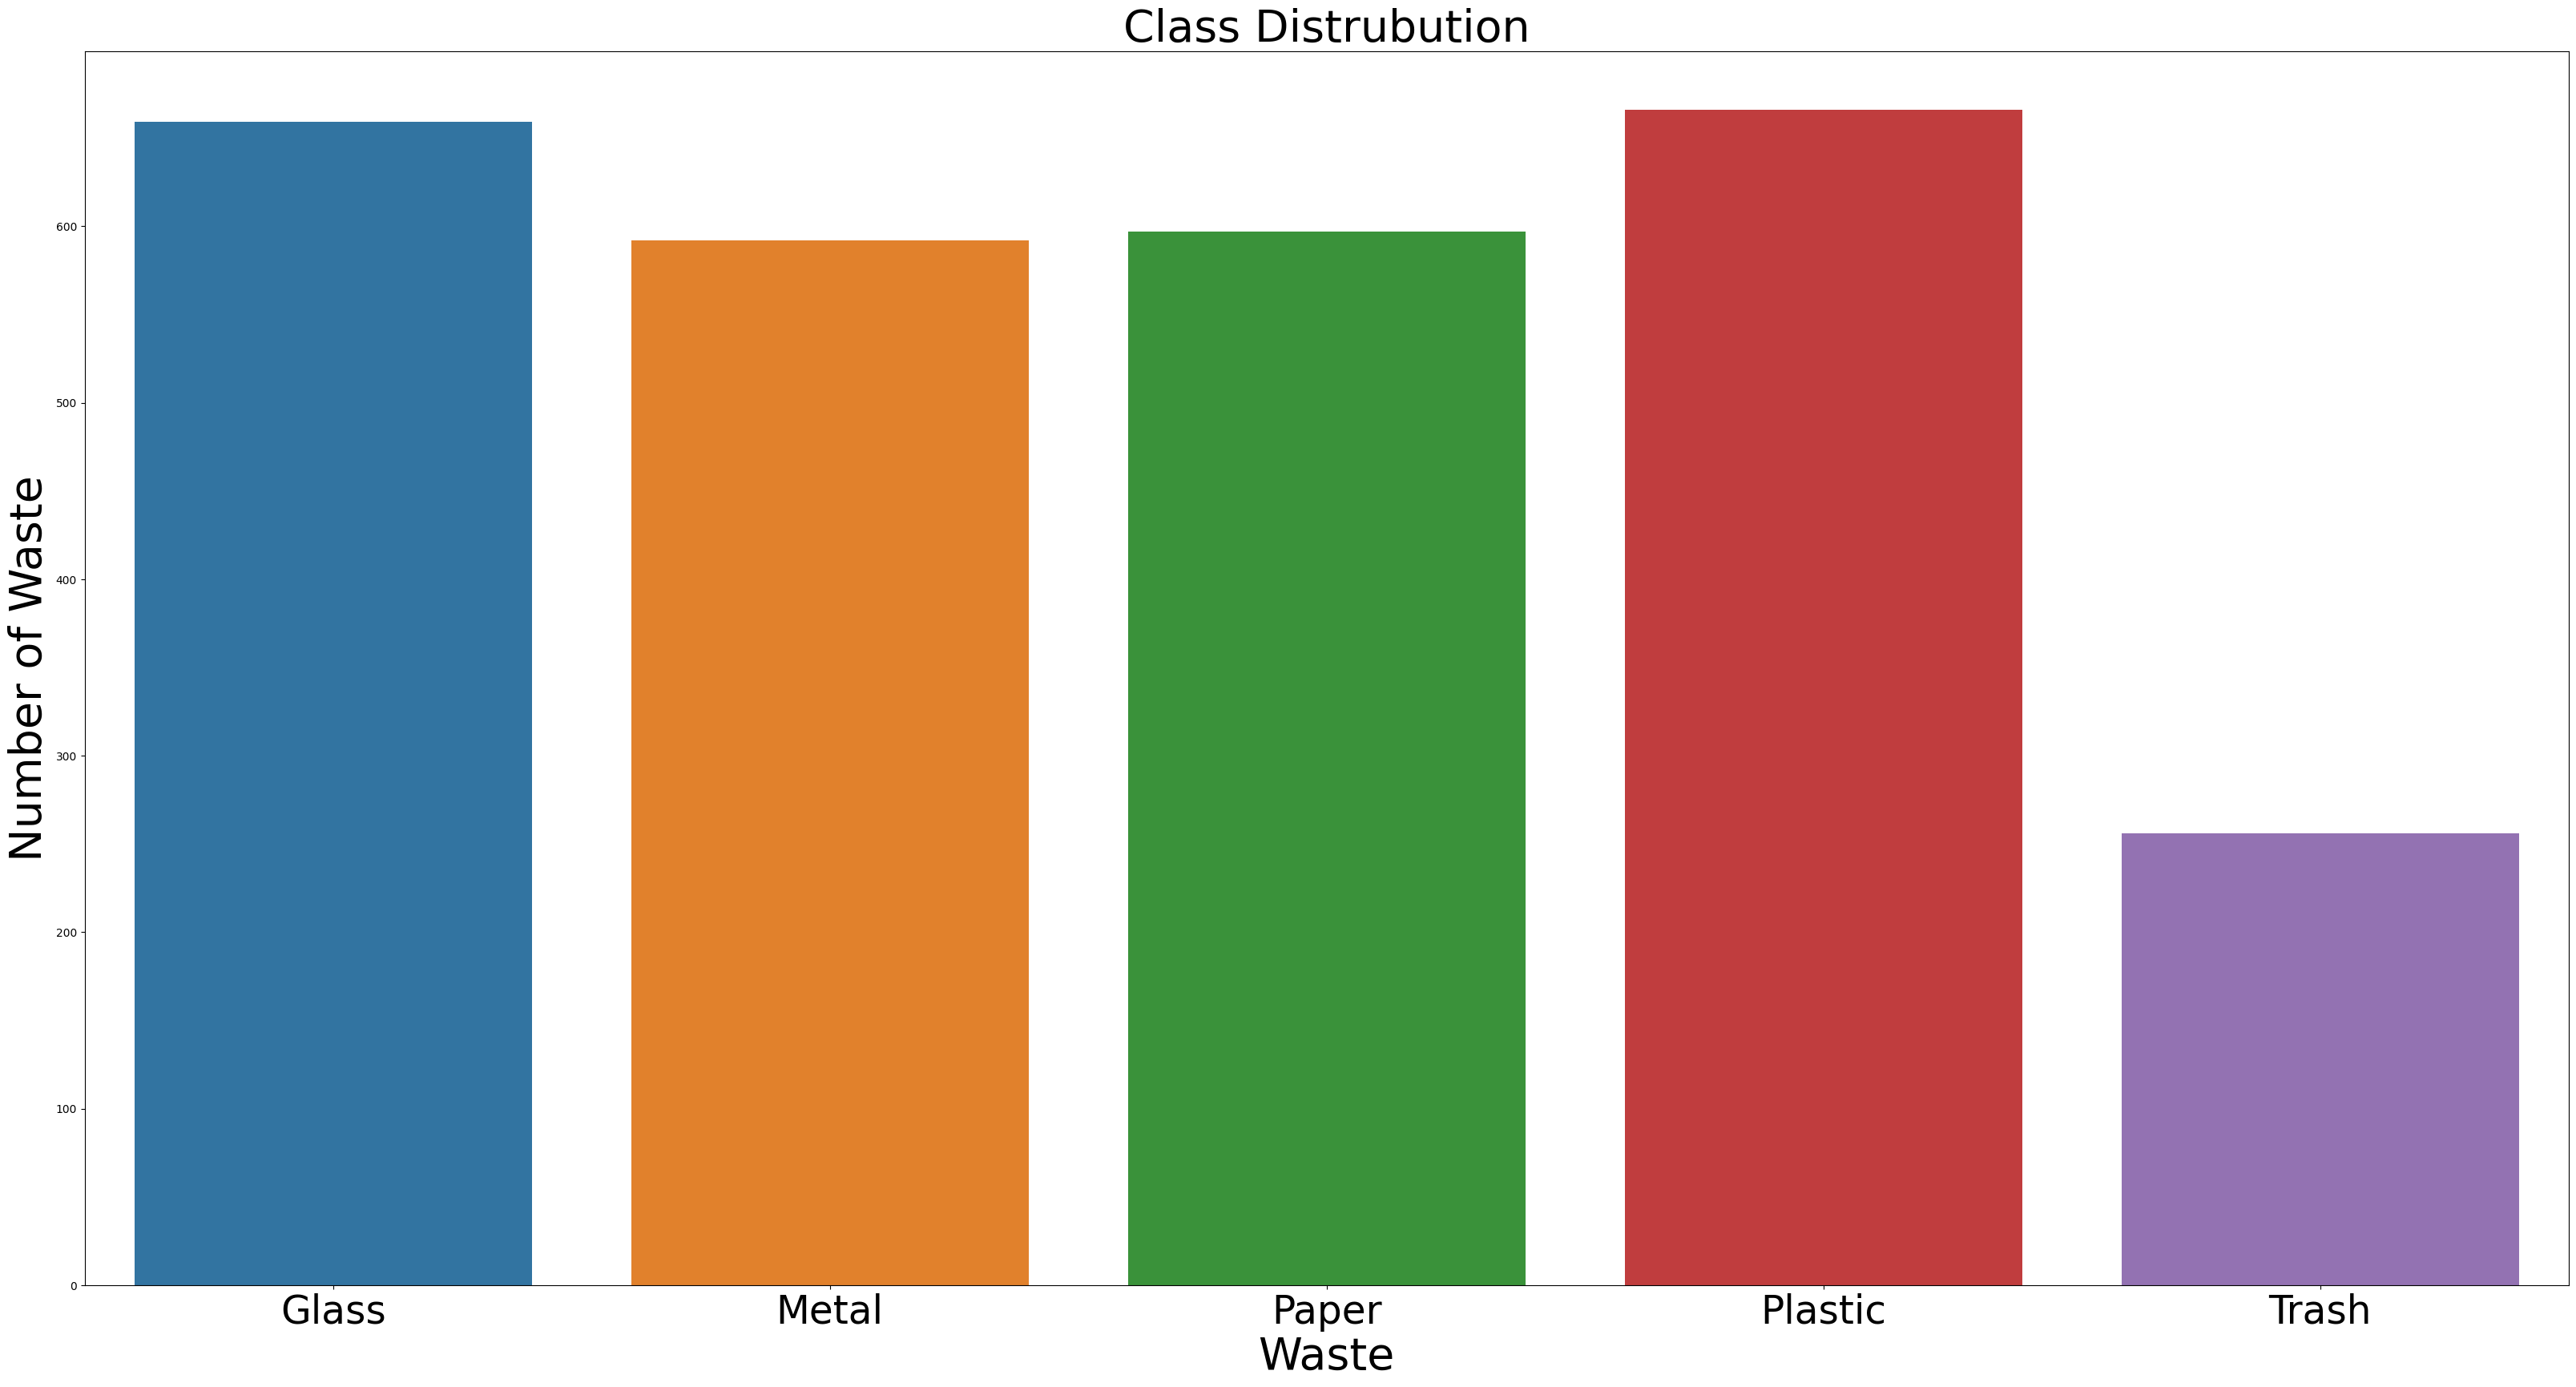

In [22]:
import seaborn as sns
figure_size = plt.rcParams['figure.figsize']
figure_size[0] = 40
figure_size[1] = 20
plt.rcParams['figure.figsize'] = figure_size

sns.barplot(data=samplesize)

index = np.arange(len(classes))

plt.xlabel('Waste', fontsize=40)
plt.ylabel('Number of Waste', fontsize=40)
plt.xticks(index, classes, fontsize=35)
plt.title('Class Distrubution', fontsize=40)
plt.show()

## Creating Model

In [5]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),


  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(5, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 220, 220, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                        

In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(lr = 0.0001), metrics=['accuracy'])

In [8]:
data=[]
for c in classes:
    i=classes.index(c)
    path=os.path.join(d,c)
    for img in os.listdir(path):
        im=cv2.imread(os.path.join(path,img))
        im=cv2.resize(im,(224,224))
        data.append([im,i])

In [9]:
data=np.array(data)
import random
random.shuffle(data)

<ipython-input-9-eb3a6eb15208>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data=np.array(data)


In [10]:
X=[]
Y=[]
for x,y in data:
    X.append(x)
    Y.append(y)

In [11]:
x=np.array(X)
y=np.array(Y)
print(x.shape,y.shape)

(2770, 224, 224, 3) (2770,)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4, stratify=y)

In [13]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(2077, 224, 224, 3) (2077,)
(693, 224, 224, 3) (693,)


## Training

In [14]:
history = model.fit(x_train, y_train, epochs=50, verbose=1,validation_data=(x_test, y_test))

Epoch 1/50
65/65 [==============================] - 36s 296ms/step - loss: 1.4081 - accuracy: 0.5753 - val_loss: 1.6096 - val_accuracy: 0.5758
Epoch 2/50
65/65 [==============================] - 14s 220ms/step - loss: 0.7045 - accuracy: 0.8036 - val_loss: 2.1788 - val_accuracy: 0.5758
Epoch 3/50
65/65 [==============================] - 14s 222ms/step - loss: 0.5382 - accuracy: 0.8353 - val_loss: 1.6307 - val_accuracy: 0.5469
Epoch 4/50
65/65 [==============================] - 14s 222ms/step - loss: 0.3182 - accuracy: 0.9008 - val_loss: 1.8212 - val_accuracy: 0.5440
Epoch 5/50
65/65 [==============================] - 14s 223ms/step - loss: 0.2569 - accuracy: 0.9215 - val_loss: 2.5174 - val_accuracy: 0.5541
Epoch 6/50
65/65 [==============================] - 15s 223ms/step - loss: 0.1888 - accuracy: 0.9427 - val_loss: 2.0217 - val_accuracy: 0.5498
Epoch 7/50
65/65 [==============================] - 14s 216ms/step - loss: 0.1236 - accuracy: 0.9663 - val_loss: 0.9567 - val_accuracy: 0.7374

# Accuracy

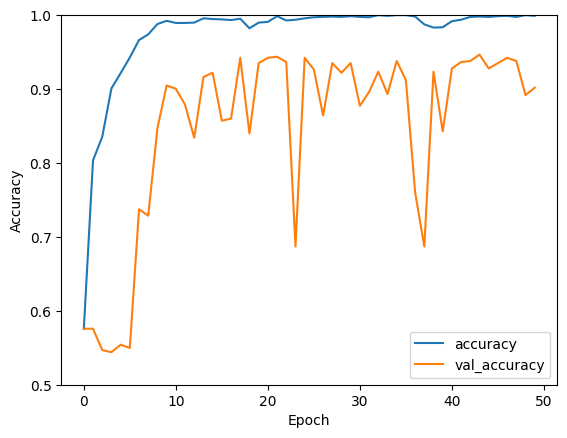

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

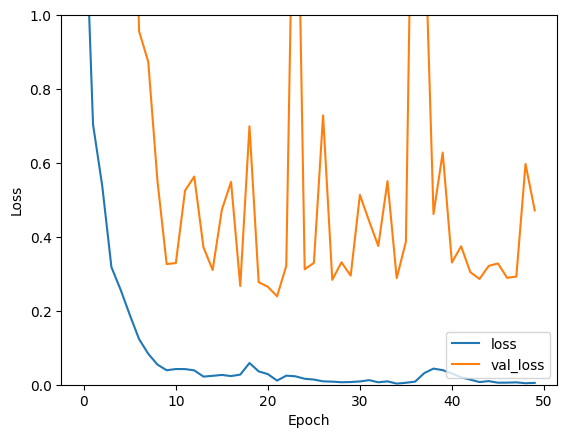

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [18]:
loss , accuracy = model.evaluate(x_test,y_test)

22/22 [==============================] - 1s 36ms/step - loss: 0.4716 - accuracy: 0.9019


In [19]:
y_pred = model.predict(x_test).round(2)

22/22 [==============================] - 1s 35ms/step


[[390   9   0   0   0]
 [ 12 144   1   1   0]
 [ 15  11  62   0   0]
 [  5   8   3  29   0]
 [  1   0   2   0   0]]


<Axes: >

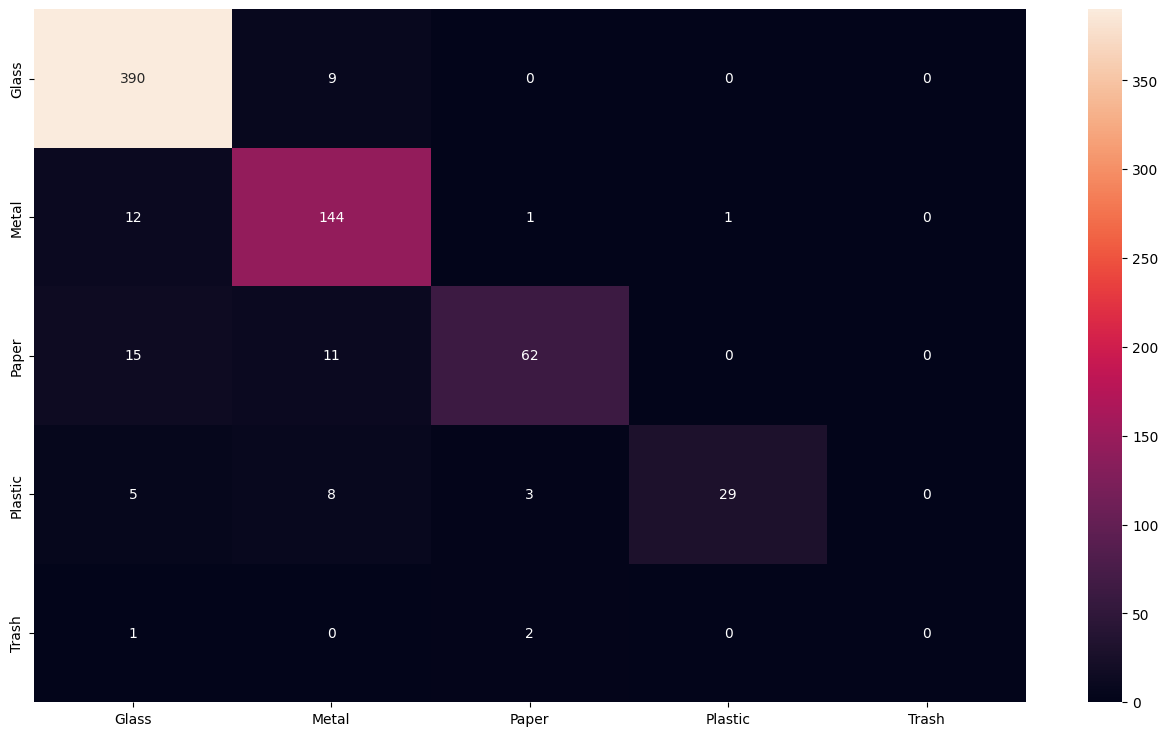

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)
print(cm)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)

In [21]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=classes)
print(cr)

              precision    recall  f1-score   support

       Glass       0.92      0.98      0.95       399
       Metal       0.84      0.91      0.87       158
       Paper       0.91      0.70      0.79        88
     Plastic       0.97      0.64      0.77        45
       Trash       0.00      0.00      0.00         3

    accuracy                           0.90       693
   macro avg       0.73      0.65      0.68       693
weighted avg       0.90      0.90      0.90       693



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Saving Model

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("CNN_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("CNN_model.h5")

## Loading Model

In [ ]:
from keras.models import model_from_json

# load json and create model
json_file = open('CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model2 = model_from_json(loaded_model_json)
# load weights into new model
model2.load_weights("CNN_model.h5")

# Saving Model In Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# !ls "/content/gdrive/My Drive"

In [17]:
model_json = model.to_json()
with open("/content/gdrive/My Drive/Colab Notebooks/CNN_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/gdrive/My Drive/Colab Notebooks/CNN_model.h5")

In [ ]:
!ls "/content/gdrive/My Drive/Colab Notebooks"